<a href="https://colab.research.google.com/github/rafiqulcse/Natural-Language-Processing-Project/blob/main/Word_segmentation_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colab Link: https://colab.research.google.com/drive/1vyM0YZTE1TqHQ8brBZmx2NjvW_wrfm9F?usp=sharing

In [ ]:
pip install tensorflow nltk

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split


# **Sample text data (replace with your own data)**

In [ ]:
github_url = "https://raw.githubusercontent.com/rafiqulcse/Natural-Language-Processing-Project/main/Dataset/NLP-project-dataset.csv"

df = pd.read_csv(github_url)
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,0
3,for your own benefit you may want read living ...,1
4,you should all sit down together and watch the...,0


In [ ]:
texts = []
labels = []

for i in range(len(df)):
  texts.append(df.loc[i][0])
  labels.append(df.loc[i][1])


In [ ]:
texts

[' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches ',
 'buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basic

In [ ]:
labels

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,


# **Word Segmentation**

In [ ]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
    return " ".join(filtered_tokens)

preprocessed_texts = [preprocess_text(text) for text in texts]


In [ ]:
max_sequence_length = 100  # Set your desired maximum sequence length

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_texts)

sequences = tokenizer.texts_to_sequences(preprocessed_texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)


In [ ]:
padded_sequences

array([[   0,    0,    0, ...,   20,  449,  618],
       [ 148,  708,  163, ...,    2, 1078, 1606],
       [   0,    0,    0, ...,    7, 1610,  351],
       ...,
       [   0,    0,    0, ...,  815,   49, 2050],
       [   0,    0,    0, ...,  172,   21,  638],
       [   0,    0,    0, ...,  624,  134,  157]], dtype=int32)

# **Split the data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


# **Define the CNN model**

In [ ]:
embedding_dim = 50
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# **Compile the model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Train the model**

In [ ]:
import numpy as np

# Convert your lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
batch_size = 32
epochs = 10

# Then, you can use model.fit as before
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
45/45 [==============================] - 10s 192ms/step - loss: 0.6347 - accuracy: 0.6799 - val_loss: 0.6509 - val_accuracy: 0.6562
Epoch 2/10
45/45 [==============================] - 6s 128ms/step - loss: 0.5940 - accuracy: 0.6812 - val_loss: 0.6398 - val_accuracy: 0.6562
Epoch 3/10
45/45 [==============================] - 8s 175ms/step - loss: 0.4372 - accuracy: 0.7542 - val_loss: 0.6093 - val_accuracy: 0.6750
Epoch 4/10
45/45 [==============================] - 4s 92ms/step - loss: 0.1808 - accuracy: 0.9451 - val_loss: 0.7896 - val_accuracy: 0.7125
Epoch 5/10
45/45 [==============================] - 4s 96ms/step - loss: 0.0786 - accuracy: 0.9701 - val_loss: 0.8858 - val_accuracy: 0.6938
Epoch 6/10
45/45 [==============================] - 4s 96ms/step - loss: 0.0459 - accuracy: 0.9833 - val_loss: 1.0382 - val_accuracy: 0.7063
Epoch 7/10
45/45 [==============================] - 2s 46ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 1.1292 - val_accuracy: 0.7125
Epoch 8/1

# **Evaluate the model**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


13/13 [==============================] - 0s 3ms/step - loss: 1.5129 - accuracy: 0.6775
Test loss: 1.5129, Test accuracy: 0.6775


# **Matrics**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
y_pred1 = model.predict(X_train)
y_pred1 = [1 if pred > 0.5 else 0 for pred in y_pred1]  # Convert probabilities to binary labels

accuracy = accuracy_score(y_train, y_pred1)
cm1 = confusion_matrix(y_train, y_pred1)

50/50 [==============================] - 0s 3ms/step


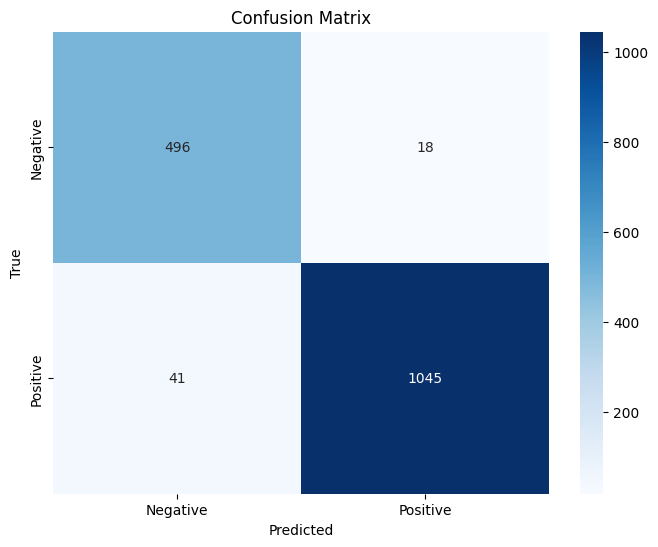

In [ ]:
import seaborn as sns
# Function to plot confusion matrix with numbers

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

labels = ['Negative', 'Positive']  # Define your class labels
plot_confusion_matrix(cm1, labels)

In [ ]:
y_pred = model.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary labels

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

13/13 [==============================] - 0s 3ms/step


In [ ]:
cm

array([[ 74,  64],
       [ 65, 197]])

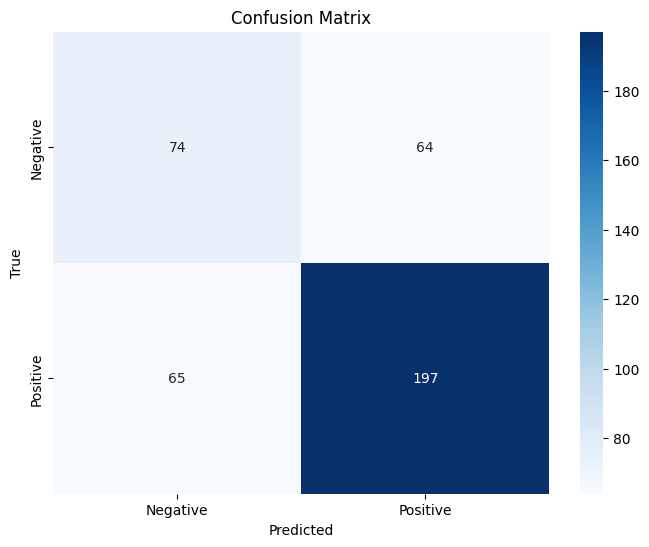

In [ ]:
import seaborn as sns
# Function to plot confusion matrix with numbers

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

labels = ['Negative', 'Positive']  # Define your class labels
plot_confusion_matrix(cm, labels)

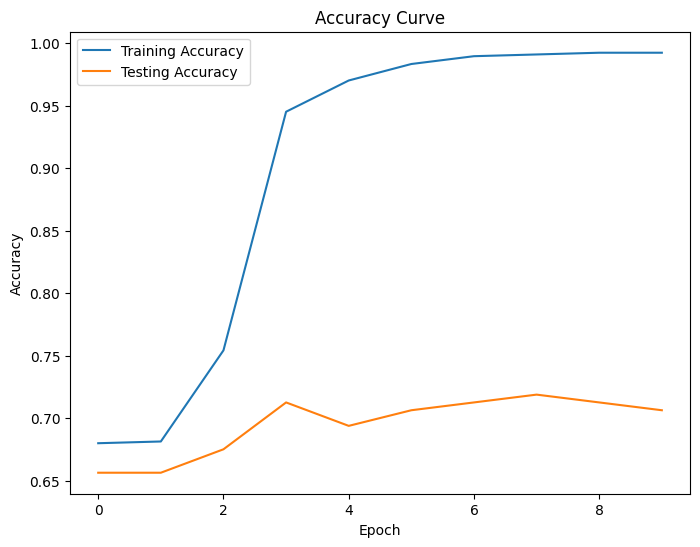

In [ ]:
def plot_accuracy_curve(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy_curve(history)
